In [1]:
import pandas as pd
df = pd.read_csv('sensor_3.csv')

####  The function show_features plots features against time and creates 6-hour interval time series for improved visualization and insight observation. Additionally, it includes vertical green lines at 1:00 AM each day to denote day intervals!

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def show_features(df, features):

    try:
        # To avoid SettingWithCopyWarning
        sensor_df = df.copy()

        # Convert the 'timestamp_tz' column to datetime format
        sensor_df['timestamp_tz'] = pd.to_datetime(sensor_df['timestamp_tz'], errors='coerce')

    except Exception as e:
        print(f"Error converting datetime: {str(e)}")
        return

    try:
        # Drop rows with missing 'timestamp_tz' values
        sensor_df = sensor_df.dropna(subset=['timestamp_tz'])

    except Exception as e:
        print(f"Error dropping rows: {str(e)}")
        return

    try:
        sensor_df = sensor_df.sort_values(by='timestamp_tz')

        # Create an array of dates at 1:00 AM, 7:00 AM, 1:00 PM, and 7:00 PM each day
        date_ranges = pd.date_range(sensor_df['timestamp_tz'].dt.floor('D').min(), sensor_df['timestamp_tz'].dt.floor('D').max(), freq='D')
        x_ticks = np.concatenate([
            date_ranges + pd.DateOffset(hours=1),
            date_ranges + pd.DateOffset(hours=7),
            date_ranges + pd.DateOffset(hours=13),
            date_ranges + pd.DateOffset(hours=19),
        ])

        # Plot the selected features against time
        for feature in features:
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.set_xticks(x_ticks)
            ax.xaxis.set_major_formatter(mdates.DateFormatter("%I %p"))
            plt.plot(sensor_df['timestamp_tz'], sensor_df[feature])
            plt.title(f'{feature} vs. Time')
            plt.xlabel('Time')
            plt.ylabel(feature)
            plt.xticks(rotation=45)

            # Add vertical lines at 1 AM each day (colored green)
            for date in date_ranges:
                plt.axvline(date + pd.DateOffset(hours=1), color='green', linestyle='--', linewidth=1)

            plt.grid(True)
            plt.show()
    except Exception as e:
        print(f"Error plotting data: {str(e)}")


## Sensor 3 behaviour observation 

#### Energy Usage Patterns:

From active power and reactive power plots we identify ON and OFF events in electrical appliances. The sudden changes in these parameters that we are seeing indicate the activation or deactivation of devices. We also can observe how energy consumption varies throughout the day. This helps in identifying peak usage times and understanding overall energy consumption patterns!


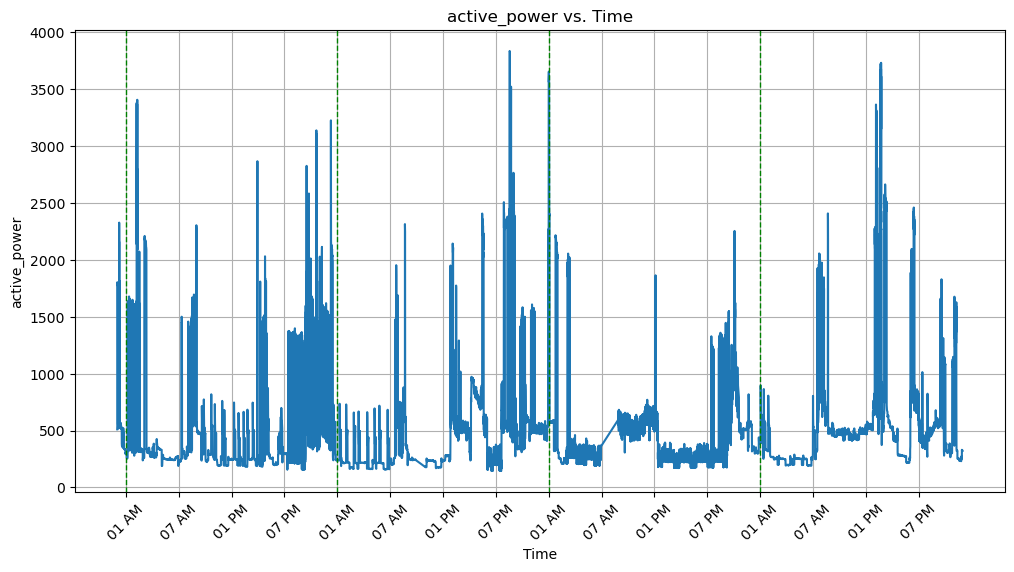

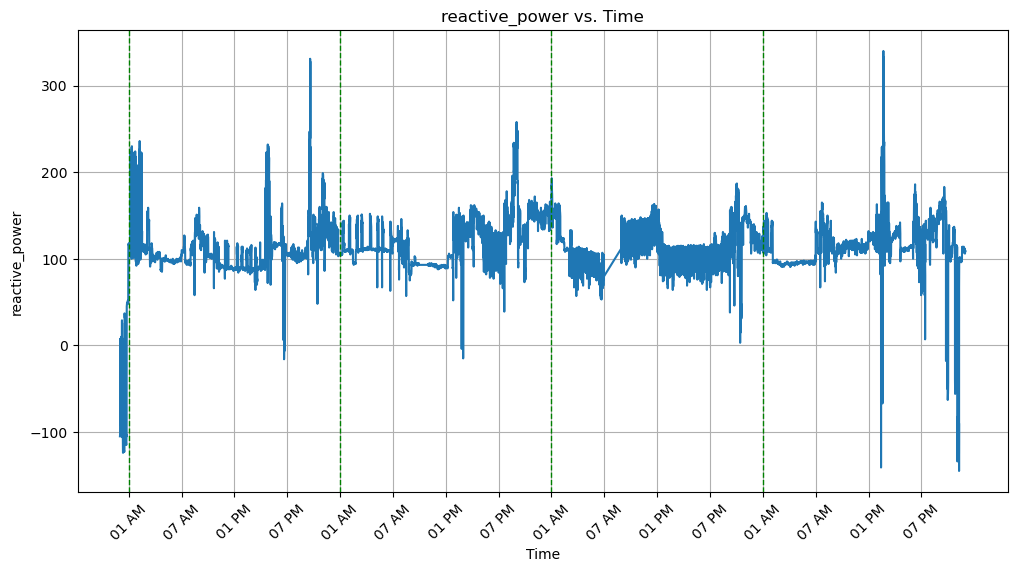

In [4]:
show_features(df, ['active_power', 'reactive_power'])


#### Power Quality Analysis:

Monitoring voltage and current waveforms over time can reveal fluctuations and disturbances in power quality. These insights are relevant for ensuring the stability of electrical systems in the smart house.

In Genral I would expect Voltage levels decrease during the night and early morning when electricity demand is lower. Need to track all sensors togther tp observ day and night consumption

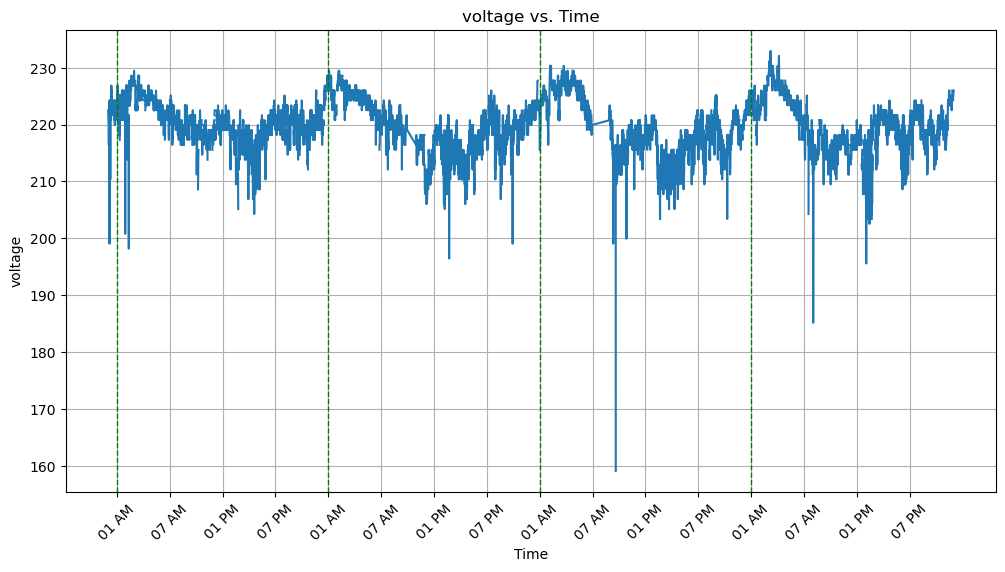

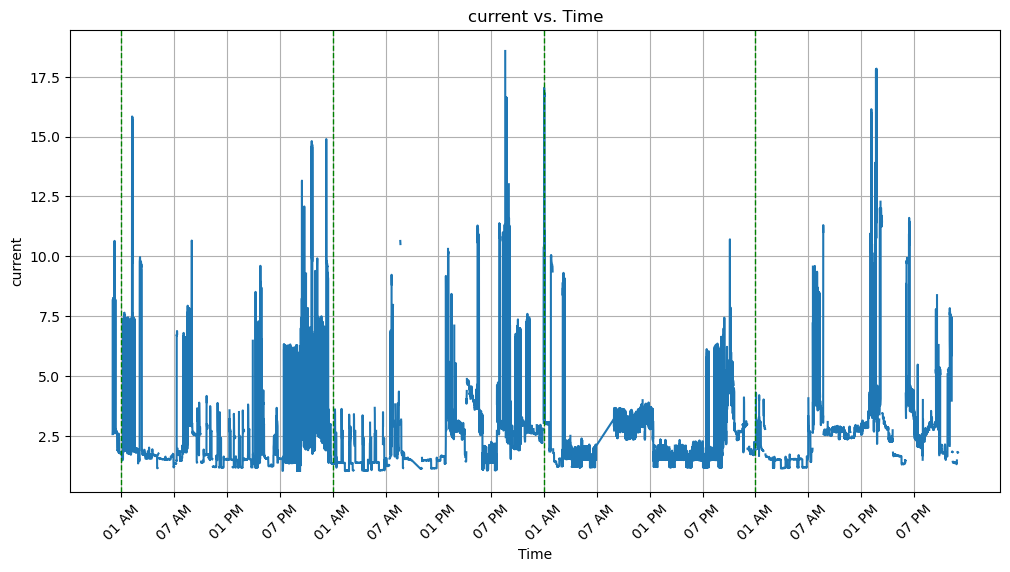

In [5]:
show_features(df, ['voltage', 'current'])

#### **Appliance Detection**:
A single peak in apparent power followed by zero values may suggest that a specific appliance or equipment with a high reactive power component is starting or operating at that time. 
minimal or no power draw during most times.
The magnitude of these peaks is extremely high, reaching values close to or over 4 million VA (4 MVA). This is a substantial amount of power, typically not seen in residential settings. It's more likely in an industrial or commercial setting where large machinery is used.


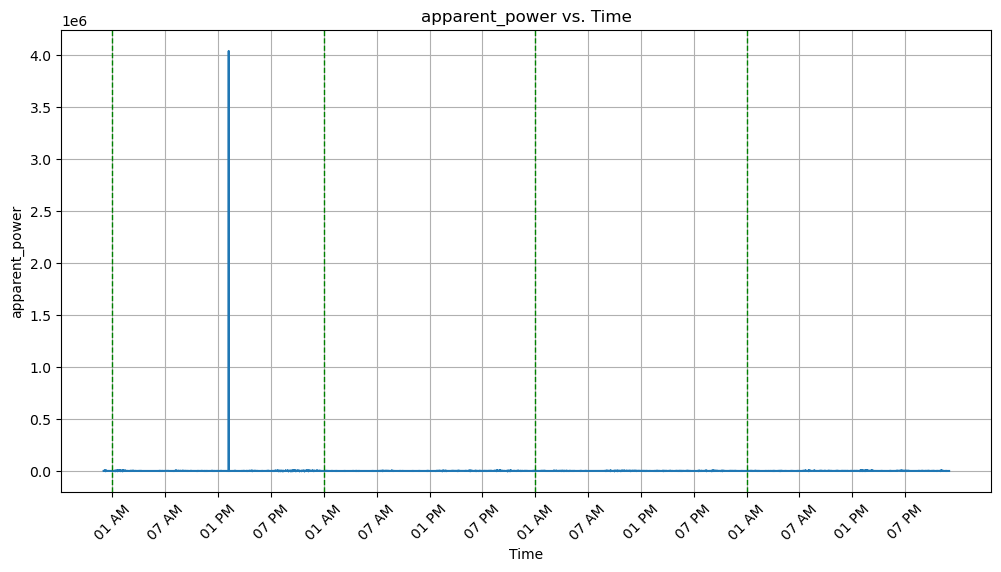

In [9]:
show_features(df, ['apparent_power'])

##### Reactive power does not contribute to real work (active power) but is associated with devices like motors, compressors, or inductive loads. These devices can cause a surge in reactive power during startup.


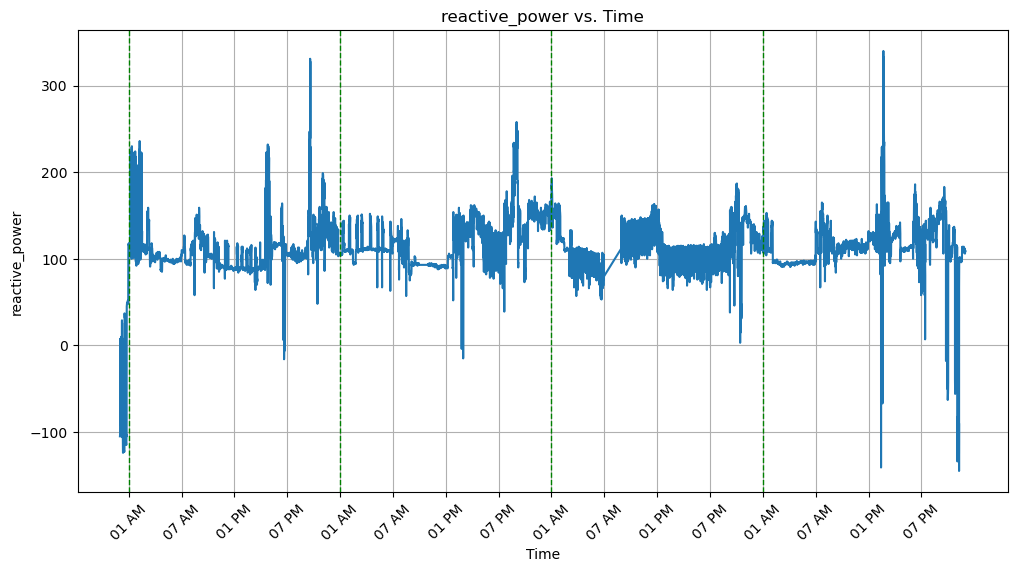

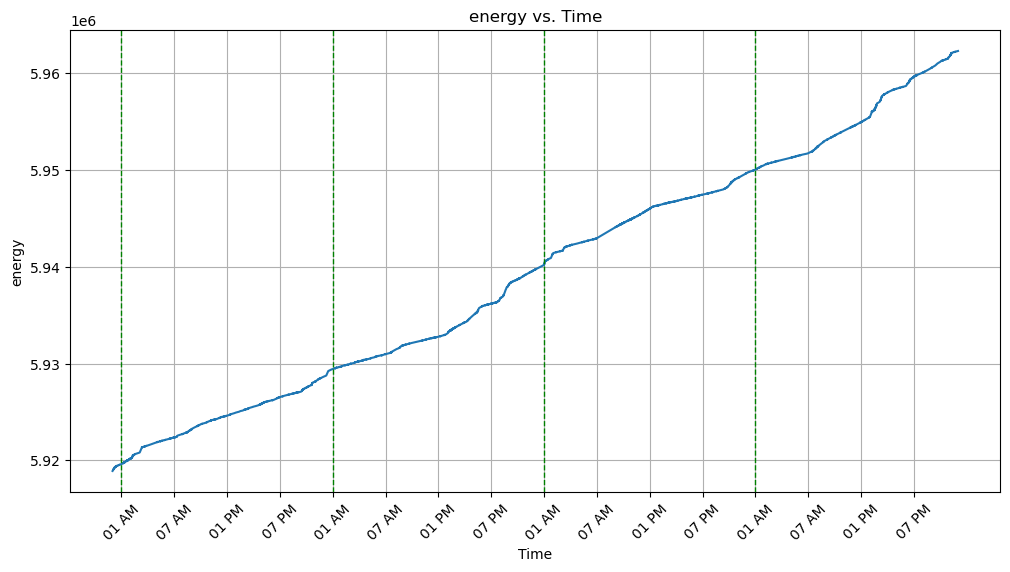

In [10]:
show_features(df, ['reactive_power', 'energy'])

### Sensor 7

consume negligible power in its standby mode.
These 2 spikes are brief and not periodic, which could indicate sporadic use of a high-power appliance.
Given the high power consumption during the spikes, the appliance could be something that draws a lot of power when in use but is not used regularly or for extended periods. 

In [12]:
df = pd.read_csv('sensor_7.csv')

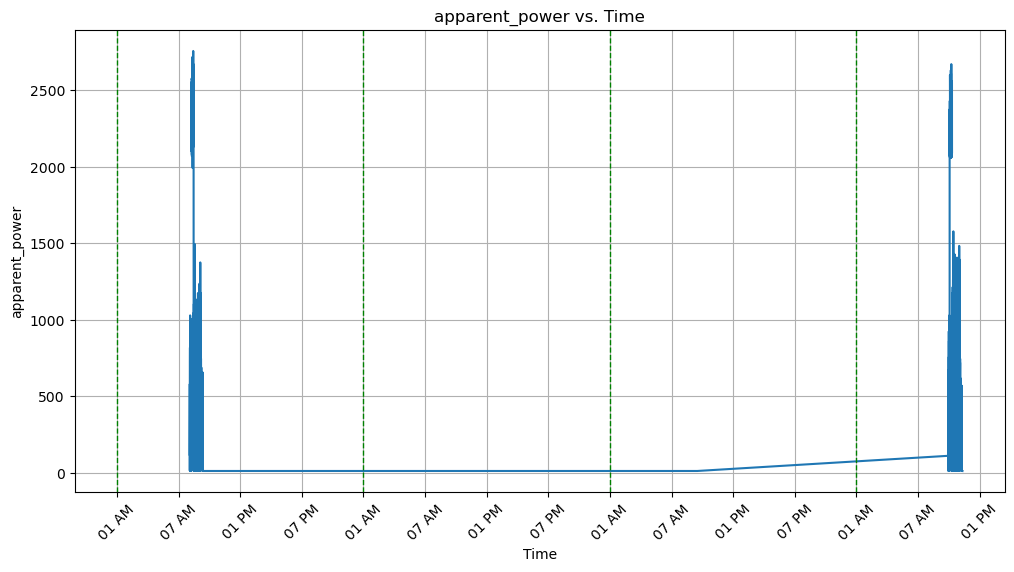

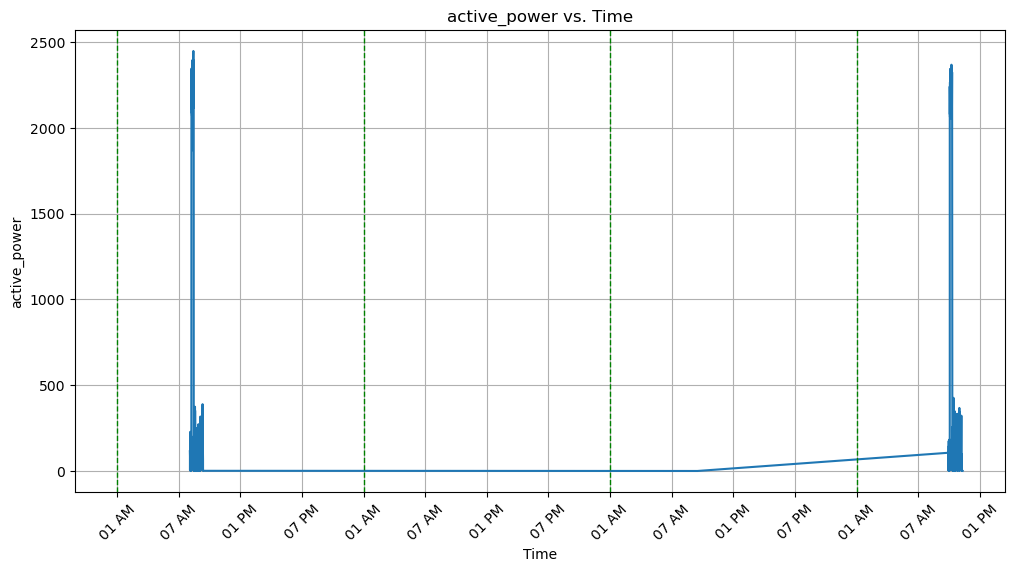

In [15]:
show_features(df, ['apparent_power','active_power'])

# Additiona two function

### load_all_data
##### Loads and processes all CSV files into one DataFrame

### show_all_features¶
##### plots features from various sensors against time and creates 6-hour interval time series for improved visualization and insight observation. Additionally, it includes vertical green lines at 1:00 AM each day to denote day intervals!

In [67]:
import os
import pandas as pd

def load_all_data(folder_path):
    
    # Create an empty list to store DataFrames for each file
    dataframes = []

    # Loop through all CSV files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Correct timestamp
            df['timestamp_tz'] = pd.to_datetime(df['timestamp_tz'], errors='coerce')
            df['timestamp_tz'] = df['timestamp_tz'].dt.floor('s')

            # Drop rows with missing values in the 'timestamp_tz' column,
            df.dropna(subset=['timestamp_tz'], inplace=True)

            # Drop specified columns
            columns_to_drop = ['coil_reversed', 'device', 'channel', 'hz', 'firmware', 'timestamp',
                               'hour', 'Unnamed: 0.1', 'Unnamed: 0', 'event_id']
            df = df.drop(columns=columns_to_drop)

            # Assign a column with the name of the file (e.g., sensor_0, sensor_1, etc.)
            df['sensor_name'] = os.path.splitext(file_name)[0]

            # Append the cleaned DataFrame to the list
            dataframes.append(df)

    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)
    # converting wh to kwh
    combined_df['energy'] = combined_df['energy'] / 1000

    return combined_df


In [70]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def show_all_features(df, features, sensor_names):
    for feature in features:
        fig, ax = plt.subplots(figsize=(12, 6))

        for sensor_name in sensor_names:
            # To avoid SettingWithCopyWarning
            sensor_df = df[df['sensor_name'] == sensor_name].copy()

            # Drop rows with missing 'timestamp_tz' values
            sensor_df = sensor_df.dropna(subset=['timestamp_tz'])
            sensor_df = sensor_df.sort_values(by='timestamp_tz')

            # Create an array of dates at 1:00 AM, 7:00 AM, 1:00 PM, and 7:00 PM each day
            date_ranges = pd.date_range(sensor_df['timestamp_tz'].dt.floor('D').min(), sensor_df['timestamp_tz'].dt.floor('D').max(), freq='D')
            x_ticks = np.concatenate([
                date_ranges + pd.DateOffset(hours=1),
                date_ranges + pd.DateOffset(hours=7),
                date_ranges + pd.DateOffset(hours=13),
                date_ranges + pd.DateOffset(hours=19),
            ])

            # Plot the selected feature against time
            plt.plot(sensor_df['timestamp_tz'], sensor_df[feature], label=f'{sensor_name} {feature}')

        ax.set_xticks(x_ticks)
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%I %p"))
        plt.title(f'{feature} vs. Time for All Sensors')
        plt.xlabel('Time')
        plt.ylabel(feature)
        plt.xticks(rotation=45)

        # Add vertical lines at 1 AM each day (colored green)
        for date in date_ranges:
            plt.axvline(date + pd.DateOffset(hours=1), color='green', linestyle='--', linewidth=1)

        plt.legend(loc='best')
        plt.grid(True)
        plt.show()


In [71]:
folder_path = 'data_set_1'
df = load_all_data(folder_path)

### The plot distinguishes between appliances based on energy consumption.

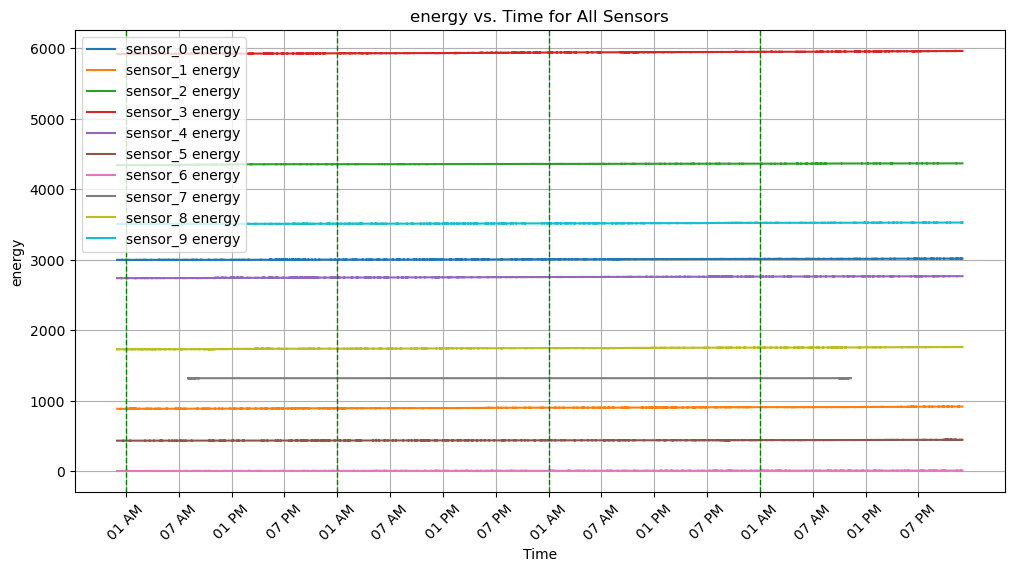

In [86]:

#List of sensor names to visualize
sensor_names = ['sensor_0', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
               'sensor_8', 'sensor_9']

# List of features to plot
features_to_plot = ['energy']

show_all_features(df, features_to_plot, sensor_names)

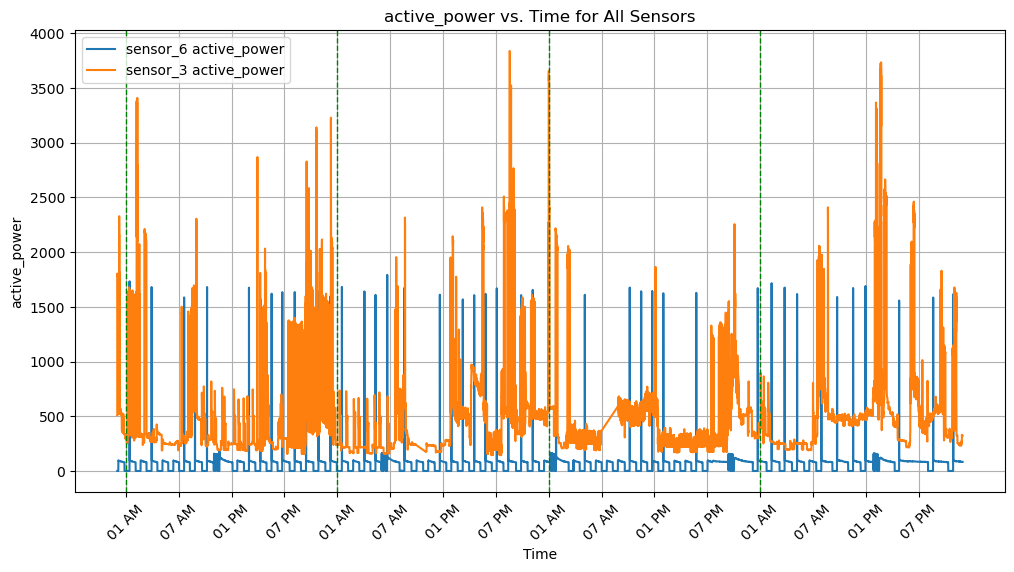

In [87]:
#List of sensor names to visualize
sensor_names = ['sensor_6', 'sensor_3']
               
# List of features to plot
features_to_plot = ['active_power']

show_all_features(df, features_to_plot, sensor_names)

##### The observed scenario with Sensor 6 and Sensor 3, where there's a significant difference in energy consumption but only a slight difference in active power!

Both sensors show periodic spikes in power consumption, indicating that the appliances connected to these sensors are being turned on and off regularly.
The usage does not appear to be constant throughout the day, suggesting that these appliances are not meant to run continuously.
